## Frequentist A/B Testing

Suppose you have an online shop selling clothes. You currently have two images of models modelling your outfits. You want to know which image will increase the rate at which individuals will click the link to go to your shop. After 1000 random individuals have visited the website, we noticed that s525 individuals have visited the site with image 1 and 475 individuals have visited the site with image 2. Furthermore, we record that of the 525 who visited site1 78 of them have clicked to go to shop whereas, 65 of the individuals who visited site 2 has clicked to visit the shop.

Let's start our A/B Test. Let our null hypothesis be that image 1 iss better than image 2. We will use the binomial distribution because we have two discree variables wih some unknown factors. We can try to estimate the true click rate based on our small sample.

In [3]:
# importing the dependencies
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm, binom
sns.set()

# constants
confidence_interval = 0.95
site1, site2 = 550, 450
click_1, click_2 = 78, 65
rate_1, rate_2 = click_1 / site1, click_2 / site2

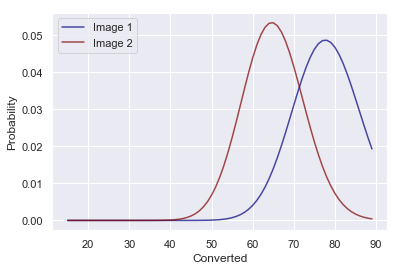

In [4]:
# visualize probability distribution
clicks = np.arange(15, 90)

prob_a = binom(site1, rate_1).pmf(clicks)
prob_b = binom(site2, rate_2).pmf(clicks)

plt.plot(clicks, prob_a, label="Image 1", alpha=0.7, color = 'navy')
plt.plot(clicks, prob_b, label="Image 2", alpha=0.7, color = 'maroon')
plt.legend()
plt.xlabel("Converted")
plt.ylabel("Probability")
plt.show()

**Let's get normal**  
Sure, we can work with binomial distributions in this case. And Poisson distributions in the "How long were you on the site" case. We could swap for every question… or we can invoke the Central Limit Theorem. As we're interested in the average conversion, or average time spent on the site, this averaging of an underlying distribution means our final estimate will be well approximated by a normal distribution.

In [5]:
# Where does this come from? See the link above.
std_1 = np.sqrt(rate_1 * (1 - rate_1) / site1)
std_2 = np.sqrt(rate_2 * (1 - rate_2) / site2)

click_rate = np.linspace(0, 0.2, 200)
prob_1 = norm(rate_1, std_1).pdf(click_rate)
prob_2 = norm(rate_2, std_2).pdf(click_rate)

zscore is 0.118, with p-value 0.453


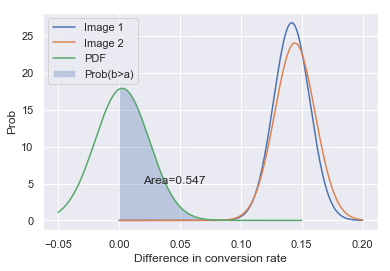

In [6]:
# Make the bar plots.
plt.plot(click_rate, prob_1, label="Image 1")
plt.plot(click_rate, prob_2, label="Image 2")
plt.xlabel("Converted")
plt.ylabel("Probability")

z_score = (rate_2 - rate_1) / np.sqrt(std_1**2 + std_2**2)
p = norm(rate_2 - rate_1, np.sqrt(std_1**2 + std_2**2))

x = np.linspace(-0.05, 0.15, 1000)
y = p.pdf(x)
area_under_curve = p.sf(0)
plt.plot(x, y, label="PDF")
plt.fill_between(x, 0, y, where=x>0, label="Prob(b>a)", alpha=0.3)
plt.annotate(f"Area={area_under_curve:0.3f}", (0.02, 5))
plt.legend()
plt.xlabel("Difference in conversion rate"); plt.ylabel("Prob");

print(f"zscore is {z_score:0.3f}, with p-value {norm().sf(z_score):0.3f}")

How can we interpret this result? Clearly, we can fail to accept our null hypothesis as the p-value is substantially below our p-critical value.

## DELETE
Great! So, how to phrase this result? Using our frequentist approach so far, we would say that given the null hypothesis is true (that B is less then or equal to A), we would expect to get this result or a result more extreme only 2.9% of the time. As that is a significant result (typically p < 5%), we reject the null hypothesis, and state that we have evidence that B > A.

We should explicitly note here that this is a one-tailed test - the question we've asked is if B > A. An alterative is the two-tailed test, where we just want to discriminate that B is different to A. In that case, our p-value is actually 2×2.9=5.82×2.9=5.8 percent (as we have two tails, not one), and we would want more samples before rejecting the null hypothesis if we stick to the p-value of 0.05 threshold.

However, we've made a lot of plots for this to try and explain the concept. You can easily write a tiny function to simplify all of this. Whether you want the confidence or the p-value just means changing the final norm.cdf to norm.sf.

In [7]:
def get_confidence_ab_test(click_1, site1, click_2, site2):
    rate_1 = click_1 / site1
    rate_2 = click_2 / site2
    std_1 = np.sqrt(rate_1 * (1 - rate_1) / site1)
    std_2 = np.sqrt(rate_2 * (1 - rate_2) / site2)
    z_score = (rate_2 - rate_1) / np.sqrt(std_1**2 + std_2**2)
    return norm.cdf(z_score)

print(get_confidence_ab_test(click_1, site1, click_2, site2))

0.5469399627406029


Which, rephrased to the language of before, is that A > B only 2.8% of the time, which is statistically significant such that we can reject our hypothesis (that A <= B).
Often this is the way we would actually do more complicated analyses, when there isn't an analytic solution. The power of modern computing opens many doors!

In [8]:
# top down and botttom up linkage methods for hiearchical clustering